In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.append("..")

from src.datasets.sky_finder_cover_dataset import SkyFinderCoverModule
from src.config import SEED

In [14]:
sky_cover_module = SkyFinderCoverModule(
    batch_size=1,
    n_workers=1,
    seed=SEED
)
sky_cover_module.setup(stage="fit")
sky_cover_module.setup(stage="test")
train_dataloader = sky_cover_module.train_dataloader()
val_dataloader = sky_cover_module.val_dataloader()

🌱 Setting the seed to 0 for generating dataloaders.
🌱 Setting the seed to 0 for generating dataloaders.


c:\Users\arnau\work\lipid_internship\git\notebooks\..\src\datasets\sky_finder_cover_dataset.py:101: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  )
c:\Users\arnau\work\lipid_internship\git\notebooks\..\src\datasets\sky_finder_cover_dataset.py:119: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  self.path = path
c:\Users\arnau\work\lipid_internship\git\notebooks\..\src\datasets\sky_finder_cover_dataset.py:124: UserWarning: Argument(s) 'angle_lower, angle_upper, num_flare_circles_lower, num_flare_circles_upper' are not valid for transform RandomSunFlare
  if use_augmentations:


In [4]:
it = iter(train_dataloader)

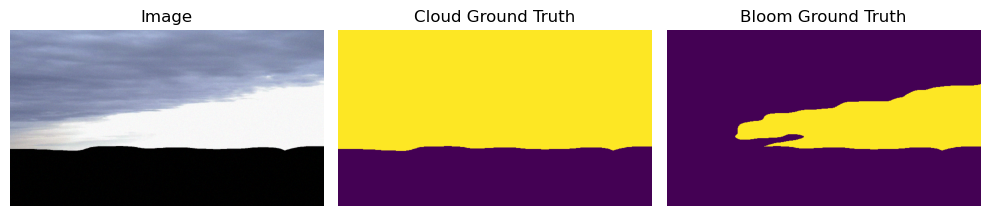

In [21]:
def unnormalize(
        image,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ):
    image = image.copy()
    image = image * std + mean
    image = image.clip(0, 1)
    return image

batch = next(it)
image = batch[0][0]
cloud_ground_truth = batch[1][0]
bloom_ground_truth = batch[2][0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(unnormalize(image.numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Cloud Ground Truth")
plt.imshow(cloud_ground_truth.numpy().transpose(1, 2, 0), vmin=0, vmax=1)
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Bloom Ground Truth")
plt.imshow(bloom_ground_truth.numpy().transpose(1, 2, 0), vmin=0, vmax=1)
plt.axis("off")
plt.tight_layout()
plt.show()